<a href="https://colab.research.google.com/github/nkhan054002/QuantProjects/blob/main/asset_allocation_laterversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##asset allocation

no one size fits all, key framework - is MPT - modern portfolio theory - markovitz
we need to analyze the risk and benefit of a particular stock as a whole on the portfolio itself

lower the correlation - better it is for diversification

stuff alrdy covered in the last assignment - just revise

In [ ]:
##basic 1/n portfolio

In [ ]:
pip install yfinance

In [ ]:
pip install pyfolio

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf

In [ ]:
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT', 'TWTR']
START_DATE = '2017-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

[*********************100%***********************]  4 of 4 completed
Downloaded 501 rows of data.


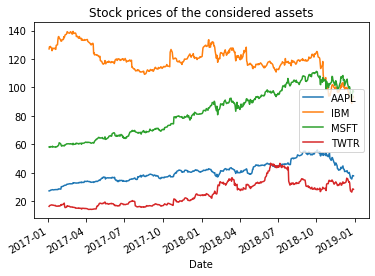

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                       end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
prices_df['Adj Close'].plot(title='Stock prices of the considered assets')

In [ ]:
returns = prices_df['Adj Close'].pct_change().dropna()
returns

,AAPL,IBM,MSFT,TWTR
Date,,,,
2017-01-04,-0.001119,0.012381,-0.004474,0.025547
2017-01-05,0.005085,-0.003308,0.000000,0.013642
2017-01-06,0.011148,0.004920,0.008668,0.004681
2017-01-09,0.009160,-0.011089,-0.003183,0.019220
2017-01-10,0.001008,-0.012705,-0.000319,-0.007429
...,...,...,...,...
2018-12-21,-0.038896,-0.018404,-0.032312,-0.067600
2018-12-24,-0.025874,-0.030377,-0.041739,-0.031490
2018-12-26,0.070421,0.035512,0.068310,0.083554


In [ ]:
#portfolio_weights = n_assets * [1 / n_assets]
#the above thing is terrible and very confusing to write

In [ ]:
[1/n_assets]

[0.25]

In [ ]:
n_assets

4

In [ ]:
4*[1/4]

[0.25, 0.25, 0.25, 0.25]

In [ ]:
portfolio_weights = n_assets * [1 / n_assets]
#basically makes [0.25] into 4 entries

In [ ]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), 
                             index=returns.index)
portfolio_returns

Date
2017-01-04    0.008084
2017-01-05    0.003855
2017-01-06    0.007354
2017-01-09    0.003527
2017-01-10   -0.004861
                ...   
2018-12-21   -0.039303
2018-12-24   -0.032370
2018-12-26    0.064449
2018-12-27    0.005457
2018-12-28   -0.005651
Length: 500, dtype: float64

Start date,2017-01-04
End date,2018-12-28
Total months,23
,Backtest
Annual return,17.7%
Cumulative returns,38.1%
Annual volatility,21.8%
Sharpe ratio,0.86
Calmar ratio,0.70
Stability,0.87
Max drawdown,-25.3%


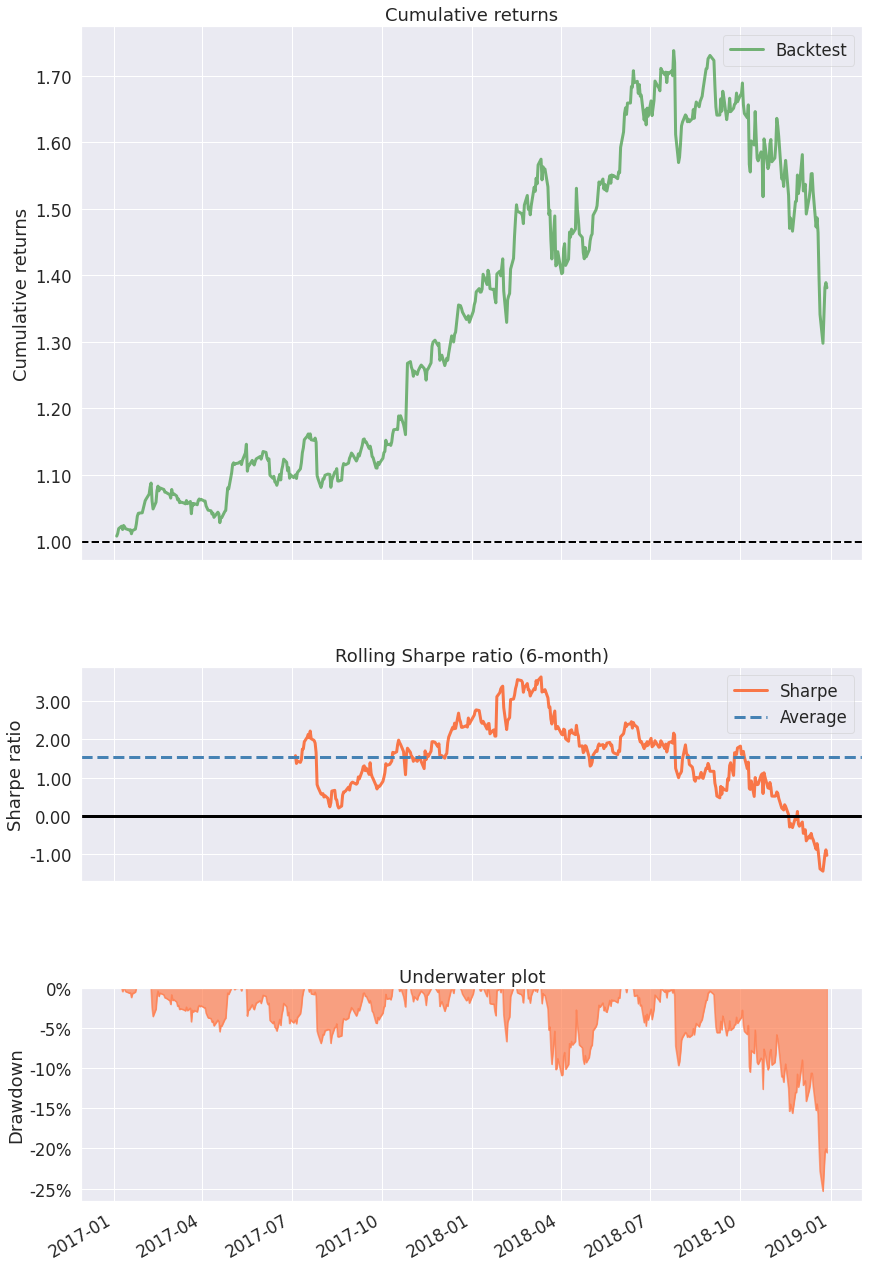

In [ ]:
pf.create_simple_tear_sheet(portfolio_returns)
## The name comes from an old practice where stockbrokers at the S&P would tear a sheet out of their 
##summary books to give to investors as a stock recommendation.

##try to get the thing into a data frame so as to use other ratios 

In [ ]:
#print(a)

#@efficient frontier using monte carlo and also plotting it


In [ ]:
##efficient frontier using monte carlo simulations

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
N_PORTFOLIOS = 10 ** 3
##actually took it as 10**5(i am taking it as 10**3 for speed purposes) - in the udemy course
N_DAYS = 252
RISKY_ASSETS = ['FB', 'TSLA', 'TWTR', 'MSFT']
RISKY_ASSETS.sort()
##this needs to be done - since yf.download always does the arrangement of the dataframe alphabetically
RISKY_ASSETS
# BASICALLY ALPHABAETICAL ORDER ME KAR DIYA LOL

['FB', 'MSFT', 'TSLA', 'TWTR']

In [ ]:
START_DATE = '2010-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                       end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')
#prices_df

[*********************100%***********************]  4 of 4 completed
Downloaded 2263 rows of data.


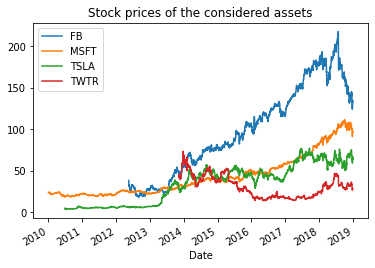

In [ ]:
prices_df['Adj Close'].plot(title='Stock prices of the considered assets');


In [ ]:
returns_df = prices_df['Adj Close'].pct_change(axis = 0).dropna()
returns_df
# axis = 0 for differencing along a particular column

,FB,MSFT,TSLA,TWTR
Date,,,,
2013-11-08,-0.000631,0.007466,-0.013021,-0.072383
2013-11-11,-0.027982,-0.005028,0.048931,0.030012
2013-11-12,0.008874,-0.006119,-0.047685,-0.023310
2013-11-13,0.045055,0.021413,0.006531,0.016706
2013-11-14,0.005748,-0.003669,-0.007931,0.049061
...,...,...,...,...
2018-12-21,-0.063343,-0.032312,0.013920,-0.067600
2018-12-24,-0.007123,-0.041739,-0.076242,-0.031490
2018-12-26,0.081573,0.068310,0.103930,0.083554


In [ ]:
avg_returns = returns_df.mean() * N_DAYS
avg_returns
##lol FB is going on a loss - beware
##lol the all in logic neednt mean jackshit in stocks - since its based on expectations

FB      0.246548
MSFT    0.243281
TSLA    0.272377
TWTR    0.064729
dtype: float64

In [ ]:
cov_mat = returns_df.cov() * N_DAYS
cov_mat

,FB,MSFT,TSLA,TWTR
FB,0.091166,0.031494,0.047104,0.050647
MSFT,0.031494,0.052957,0.031919,0.032064
TSLA,0.047104,0.031919,0.207283,0.061352
TWTR,0.050647,0.032064,0.061352,0.302745


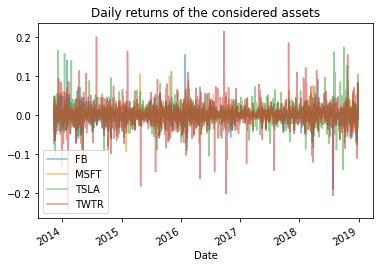

In [ ]:
returns_df.plot(title='Daily returns of the considered assets', alpha = 0.5);

In [ ]:
# cmd + ? for commenting 

In [ ]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]
weights

array([[0.14102156, 0.35796222, 0.27560979, 0.22540643],
       [0.12620081, 0.1261813 , 0.04698284, 0.70063506],
       [0.2613905 , 0.30790022, 0.00895102, 0.42175826],
       ...,
       [0.22455132, 0.57937994, 0.05557977, 0.14048898],
       [0.43284995, 0.02950628, 0.28332609, 0.25431769],
       [0.23544712, 0.27781277, 0.37312364, 0.11361647]])

tbh ig i neednt do this again

#@ efficient frontier using scipy

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
N_PORTFOLIOS = 10 ** 3
N_DAYS = 252
RISKY_ASSETS = ['FB', 'TSLA', 'TWTR', 'MSFT']
RISKY_ASSETS.sort()
START_DATE = '2010-01-01'
END_DATE = '2018-12-31'
n_assets = len(RISKY_ASSETS)
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                       end=END_DATE, adjusted=True)
returns_df = prices_df['Adj Close'].pct_change(axis = 0).dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

[*********************100%***********************]  4 of 4 completed


In [ ]:
import numpy as np
import scipy.optimize as sco

In [ ]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

In [ ]:
def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

In [ ]:
def get_efficient_frontier(avg_rtns, cov_matrix, returns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_retns, cov_matrix)
    bounds = tuple((0,1) for asset in range(n_assets))
    #a tuplet of (0,1) - size = n_assets
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in returns_range:
      ##basically for every return value in the input - we will be adding a point to the output array which exists on the max sharpe ratio portfolio
        constraints = ({'type': 'eq', 
                       'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret},
                      {'type': 'eq', 
                      'fun': lambda x: np.sum(x) - 1})
        efficient_portfolio = sco.minimize(get_portf_vol, initial_guess, 
                                          args=args, method='SLSQP', 
                                          constraints=constraints,
                                          bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)
        
    return efficient_portfolios

In [ ]:
rtns_range = np.linspace(-0.22, 0.32, 200)
##whats the point of this

In [ ]:
n_assets_trial = 5
abc = n_assets_trial*[1. /n_assets_trial]
print(abc) 
abcd = n_assets_trial*[1 /n_assets_trial]
abcd
##the default weights

[0.2, 0.2, 0.2, 0.2, 0.2]


[0.2, 0.2, 0.2, 0.2, 0.2]

In [ ]:
# https://www.youtube.com/watch?v=cXHvC_FGx24 - for to get the scipy.optimize a explaination
#or jst simply refer to the scipy_optimize wala ipynb file

In [ ]:
bnds = tuple((0,1) for i in range(n_assets_trial))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [ ]:
anb = (n_assets_trial,returns_df)
print(type(anb))
anb

<class 'tuple'>


(5,                   FB      MSFT      TSLA      TWTR
 Date                                              
 2013-11-08 -0.000631  0.007466 -0.013021 -0.072383
 2013-11-11 -0.027982 -0.005029  0.048931  0.030012
 2013-11-12  0.008874 -0.006118 -0.047685 -0.023310
 2013-11-13  0.045055  0.021413  0.006531  0.016706
 2013-11-14  0.005748 -0.003669 -0.007931  0.049061
 ...              ...       ...       ...       ...
 2018-12-21 -0.063343 -0.032312  0.013920 -0.067600
 2018-12-24 -0.007123 -0.041739 -0.076242 -0.031490
 2018-12-26  0.081573  0.068310  0.103930  0.083554
 2018-12-27  0.002534  0.006165 -0.030544  0.000698
 2018-12-28 -0.009813 -0.007808  0.056116 -0.008717
 
 [1293 rows x 4 columns])

In [ ]:
anb[0]

5

In [ ]:
anb[1]

,FB,MSFT,TSLA,TWTR
Date,,,,
2013-11-08,-0.000631,0.007466,-0.013021,-0.072383
2013-11-11,-0.027982,-0.005029,0.048931,0.030012
2013-11-12,0.008874,-0.006118,-0.047685,-0.023310
2013-11-13,0.045055,0.021413,0.006531,0.016706
2013-11-14,0.005748,-0.003669,-0.007931,0.049061
...,...,...,...,...
2018-12-21,-0.063343,-0.032312,0.013920,-0.067600
2018-12-24,-0.007123,-0.041739,-0.076242,-0.031490
2018-12-26,0.081573,0.068310,0.103930,0.083554


In [ ]:
efficient_portfolios = get_efficient_frontier(avg_returns, 
                                             cov_mat, 
                                             rtns_range)

In [ ]:
vols_range = [x['fun'] for x in efficient_portfolios]

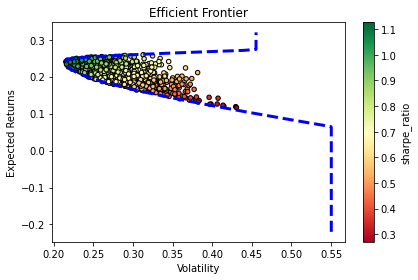

In [ ]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                     y='returns', c='sharpe_ratio',
                     cmap='RdYlGn', edgecolors='black', 
                     ax=ax)
ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
ax.set(xlabel='Volatility', 
      ylabel='Expected Returns', 
      title='Efficient Frontier')

plt.tight_layout()
plt.show()

#the minimum variance/volatility portfolio

In [ ]:
min_vol_ind = np.argmin(vols_range)
min_vol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]['fun']

min_vol_portf = {'Return': min_vol_portf_rtn,
                'Volatility': min_vol_portf_vol,
                'Sharpe Ratio': (min_vol_portf_rtn / 
                                min_vol_portf_vol)}

min_vol_portf

{'Return': 0.24130653266331661,
 'Sharpe Ratio': 1.1212393448627236,
 'Volatility': 0.21521411442519478}

In [ ]:
print('Minimum Volatility portfolio ----')
print('Performance')

for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
    
print('\nWeights')
for x, y in zip(RISKY_ASSETS, efficient_portfolios[min_vol_ind]['x']):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
Return: 24.13% Volatility: 21.52% Sharpe Ratio: 112.12% 
Weights
FB: 22.54% MSFT: 69.00% TSLA: 5.96% TWTR: 2.49% 